In [1]:
import pandas as pd
import numpy as np
import json
import seaborn as sns

import matplotlib.pyplot as plt

## Cargar datos

Muestra de datos `callenge_set.json` bajada desde:
- [https://www.kaggle.com/adityak80/spotify-millions-playlist?select=spotify_million_playlist_dataset_challenge](https://www.kaggle.com/adityak80/spotify-millions-playlist?select=spotify_million_playlist_dataset_challenge)

In [2]:
with open('challenge_set.json', 'r') as f:
    spotify = json.load(f)

In [3]:
df_spotify = pd.DataFrame(spotify['playlists'])

In [4]:
df_spotify.sort_values(by=['num_samples'], ascending=False)

,name,num_holdouts,pid,num_tracks,tracks,num_samples
8998,💃🏻,70,1049352,170,"[{'pos': 0, 'artist_name': 'Bad Bunny', 'track...",100
7669,Basketball,65,1026718,165,"[{'pos': 0, 'artist_name': 'Rich Homie Quan', ...",100
7656,bops,75,1026499,175,"[{'pos': 0, 'artist_name': 'Justin Timberlake'...",100
7657,Best of the Best,56,1026500,156,"[{'pos': 0, 'artist_name': 'The xx', 'track_ur...",100
7658,new country,89,1026503,189,"[{'pos': 0, 'artist_name': 'Old Dominion', 'tr...",100
...,...,...,...,...,...,...
662,partay,42,1001727,42,[],0
661,Tommy,14,1001725,14,[],0
660,crossfit,37,1001720,37,[],0
659,country jams,36,1001719,36,[],0


In [5]:
df_explode = df_spotify.explode('tracks').reset_index()

In [6]:
df_explode

,index,name,num_holdouts,pid,num_tracks,tracks,num_samples
0,0,spanish playlist,11,1000002,11,NaN,0
1,1,Groovin,48,1000003,48,NaN,0
2,2,uplift,40,1000004,40,NaN,0
3,3,WUBZ,27,1000006,27,NaN,0
4,4,new,41,1000007,41,NaN,0
...,...,...,...,...,...,...,...
281995,9995,Playlist 2015,20,1006767,21,"{'pos': 0, 'artist_name': 'El Gran Combo De Pu...",1
281996,9996,Workout,24,1006771,25,"{'pos': 0, 'artist_name': '2Pac', 'track_uri':...",1
281997,9997,Girlz,16,1006773,17,"{'pos': 0, 'artist_name': 'Ashley DuBose', 'tr...",1
281998,9998,let's get lost,35,1006775,36,"{'pos': 0, 'artist_name': 'blackbear', 'track_...",1


In [7]:
df_json = df_explode.to_json(orient='records')
df_final = pd.json_normalize(json.loads(df_json), meta=['index']).drop(columns=['tracks'])

df_final.head()

,index,name,num_holdouts,pid,num_tracks,num_samples,tracks.pos,tracks.artist_name,tracks.track_uri,tracks.artist_uri,tracks.track_name,tracks.album_uri,tracks.duration_ms,tracks.album_name
0,0,spanish playlist,11,1000002,11,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Groovin,48,1000003,48,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,uplift,40,1000004,40,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,WUBZ,27,1000006,27,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,new,41,1000007,41,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df_final.tail().T

,281995,281996,281997,281998,281999
index,9995,9996,9997,9998,9999
name,Playlist 2015,Workout,Girlz,let's get lost,Mama
num_holdouts,20,24,16,35,28
pid,1006767,1006771,1006773,1006775,1006778
num_tracks,21,25,17,36,29
num_samples,1,1,1,1,1
tracks.pos,0.0,0.0,0.0,0.0,0.0
tracks.artist_name,El Gran Combo De Puerto Rico,2Pac,Ashley DuBose,blackbear,Jonas Blue
tracks.track_uri,spotify:track:38griAVM808crjbFp9gcPD,spotify:track:1JClFT74TYSXlzpagbmj0S,spotify:track:4InLm5a9Qtkru6YxEjM4Qc,spotify:track:4hdog9vyyqG9pcppG2Izek,spotify:track:0NiXXAI876aGImAd6rTj8w
tracks.artist_uri,spotify:artist:6nnspeopmJAG07xOxHmqTu,spotify:artist:1ZwdS5xdxEREPySFridCfh,spotify:artist:2Y9lO01ABSO8OkBU8FI1mp,spotify:artist:2cFrymmkijnjDg9SS92EPM,spotify:artist:1HBjj22wzbscIZ9sEb5dyf


In [9]:
df_explode.tail()[['tracks']]

,tracks
281995,"{'pos': 0, 'artist_name': 'El Gran Combo De Pu..."
281996,"{'pos': 0, 'artist_name': '2Pac', 'track_uri':..."
281997,"{'pos': 0, 'artist_name': 'Ashley DuBose', 'tr..."
281998,"{'pos': 0, 'artist_name': 'blackbear', 'track_..."
281999,"{'pos': 0, 'artist_name': 'Jonas Blue', 'track..."


In [10]:
df_final.columns = [c.replace('tracks.', '') for c in df_final.columns]

df_final.head()

,index,name,num_holdouts,pid,num_tracks,num_samples,pos,artist_name,track_uri,artist_uri,track_name,album_uri,duration_ms,album_name
0,0,spanish playlist,11,1000002,11,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Groovin,48,1000003,48,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,uplift,40,1000004,40,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,WUBZ,27,1000006,27,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,new,41,1000007,41,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df_final.shape

(282000, 14)

In [12]:
df_final.isna().sum()

index               0
name            15000
num_holdouts        0
pid                 0
num_tracks          0
num_samples         0
pos              1000
artist_name      1000
track_uri        1000
artist_uri       1000
track_name       1000
album_uri        1000
duration_ms      1000
album_name       1000
dtype: int64

## Análisis descriptivo

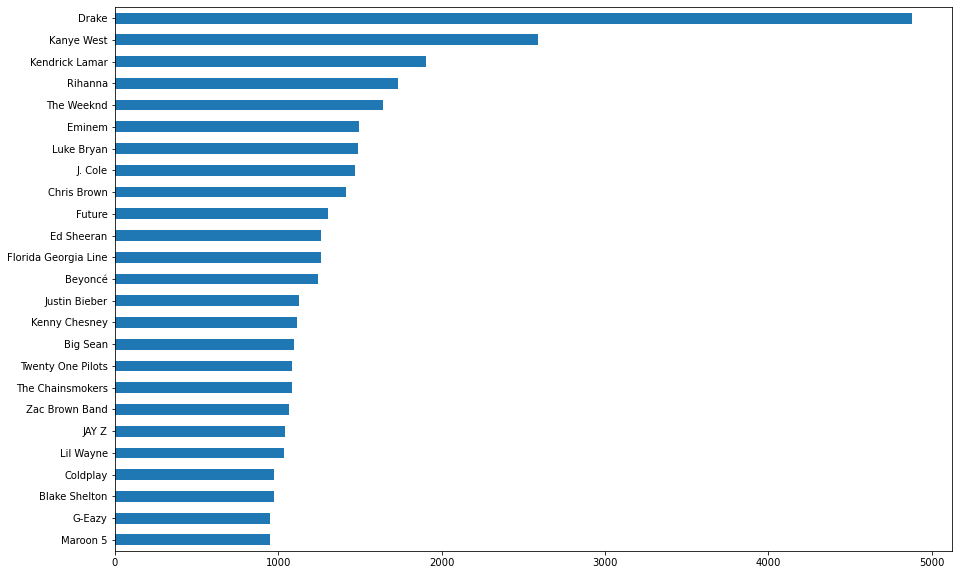

In [13]:
df_final['artist_name'].value_counts()[:25].sort_values().plot(kind='barh', figsize=(15,10));

/home/giani/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='duration_ms', ylabel='Density'>

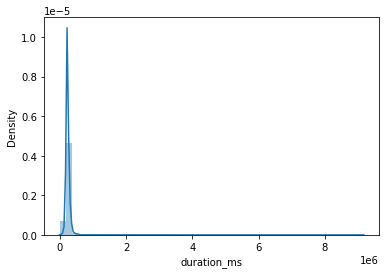

In [14]:
sns.distplot(df_final['duration_ms'])